# show loss

(-4.0, -2.0)

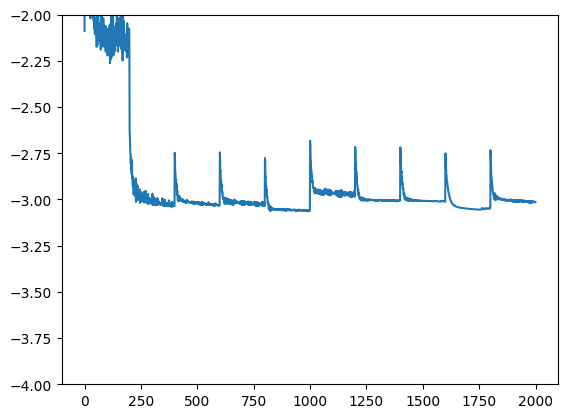

In [1]:
import sys
import os
home = os.path.expanduser("~")
sys.path.append(f'{home}/TorchFiber')

import torch, numpy as np, matplotlib.pyplot as plt
from src.TorchDSP.pbc import models
from src.TorchDSP.nneq import PBCNN
# model_path='models/SymFoPBC/L200_rho0.5_index_typeB_lossMT_batchs4_tbpl5000_iters200_lr1e-4_wdk0.001_epochs1'
# model_path = 'models/SymHoPBC/L200_rho0.5_steps2_lossMT_batchs3_tbpl10000_iters200_lr1e-4_wdk0.001_epochs1'
# model_path = 'models/SoPBC/L100_rho0.5_Lk4_lossMSE_batchs10_tbpl5000_iters200_lr1e-4_wdk0.01_epochs1'
model_path = 'models/SoPBC/L100_rho0.5_Lk4_lossMT_batchs10_tbpl5000_iters200_lr1e-4_wdk0.01_epochs1'

dic = torch.load(f'../{model_path}/Nch1_Rs80.pth', map_location='cpu')
plt.plot(dic['loss'], label=f"Nch={dic['Nch']}, Rs={dic['Rs']}")
plt.ylim(-4,-2)

# dic = torch.load(f'{model_path}/Nch1_Rs20.pth', map_location='cpu')
# plt.plot(dic['loss'], label=f"Nch={dic['Nch']}, Rs={dic['Rs']}")

# plt.legend()

# model = models[dic['model_name']](**dic['model info'])
# model.load_state_dict(dic['model'])


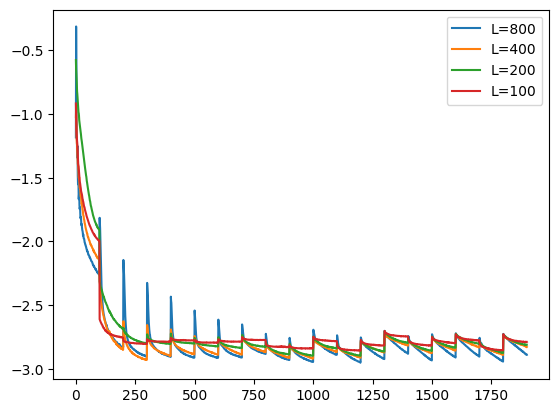

In [3]:

mode = 'Nch1_Rs160'
dic = torch.load(f'../models/FoPBCNN/L800_rho0.5_lossMT_batchs19_tbpl5000_iters100_lr1e-3_epochs1/{mode}.pth', map_location='cpu')
plt.plot(dic['loss'], label='L=800')

dic = torch.load(f'../models/FoPBCNN/L400_rho0.5_lossMT_batchs19_tbpl5000_iters100_lr1e-3_epochs1/{mode}.pth', map_location='cpu')
plt.plot(dic['loss'], label='L=400')

dic = torch.load(f'../models/FoPBCNN/L200_rho0.5_lossMT_batchs19_tbpl5000_iters100_lr1e-3_epochs1/{mode}.pth', map_location='cpu')
plt.plot(dic['loss'], label='L=200')

dic = torch.load(f'../models/FoPBCNN/L100_rho0.5_lossMT_batchs19_tbpl5000_iters100_lr1e-3_epochs1/{mode}.pth', map_location='cpu')
plt.plot(dic['loss'], label='L=100')

plt.legend()

# show coeff

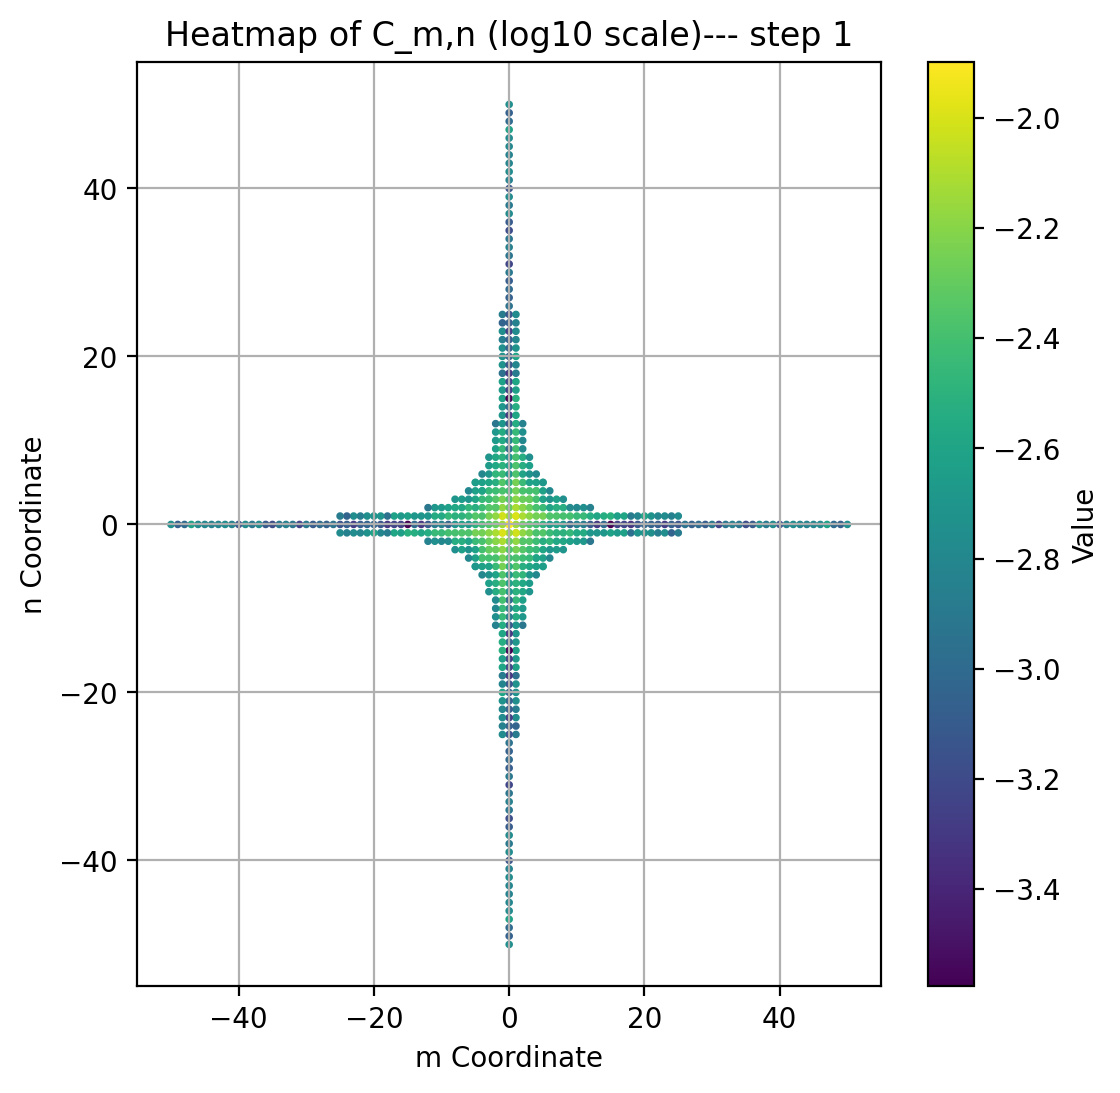

In [2]:
import torch, numpy as np, matplotlib.pyplot as plt
from src.TorchDSP.pbc import models
from src.TorchDSP.nneq import PBCNN

dic = torch.load('../models/SymFoPBC/L100_rho0.5_lossMT_batchs4_tbpl5000_iters100_lr1e-4_wdk0.001_epochs1/Nch1_Rs20.pth', map_location='cpu')


model = models[dic['model_name']](**dic['model info'])
model.load_state_dict(dic['model'])

plt.figure(figsize=(6,6), dpi=200)
X = model.show_coeff()
plt.savefig('coeff.png')

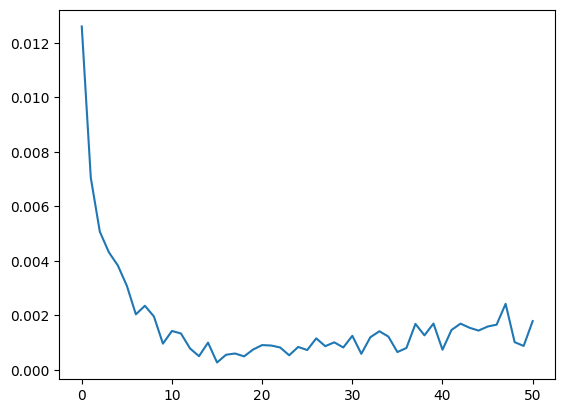

In [6]:
kernel = []
for i,(m,n) in enumerate(model.index):
    if m == 0:
        kernel.append(model.get_C()[0,i])

plt.plot(np.abs(kernel))

# show sym-model

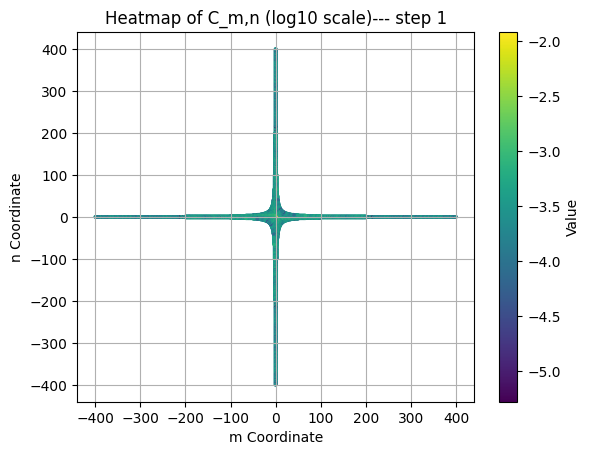

In [8]:
import torch, numpy as np, matplotlib.pyplot as plt
from src.TorchDSP.pbc import models
from src.TorchDSP.nneq import PBCNN

dic = torch.load('../models/SymFoPBC/L800_rho0.5_lossMT_batchs6_tbpl5000_iters100_lr1e-4_epochs1/Nch1_Rs80.pth', map_location='cpu')


model = models[dic['model_name']](**dic['model info'])
model.load_state_dict(dic['model'])


X = model.show_coeff()

In [9]:
dic = torch.load('../models/SymHoPBC/L200_rho0.5_steps3_lossMT_batchs3_tbpl10000_iters200_lr1e-4_wdk0_epochs1/Nch1_Rs20.pth', map_location='cpu')

dic['optimizer']['param_groups']

[{'lr': 0.0001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0.0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'params': [0, 1, 2, 3, 4, 5]}]